In [46]:
import pandas as pd
from matplotlib import pyplot as plt

In [47]:
broker_5pub_df = pd.read_csv('csv/broker_5pub_output.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'csv/broker_5pub_output.csv'

In [48]:
broker_5pub_df.head()

,topic,content,publisher_id,timestamp,latency
0,airquality,smog,pub1,2023-02-12T10:00:16,54.248341
1,airquality,good,pub1,2023-02-12T10:00:16,59.329050
2,airquality,poor,pub1,2023-02-12T10:00:16,64.527958
3,airquality,poor,pub1,2023-02-12T10:00:16,69.824676
4,airquality,smog,pub1,2023-02-12T10:00:16,74.958236


In [49]:
# broker_5pub_df['latency']

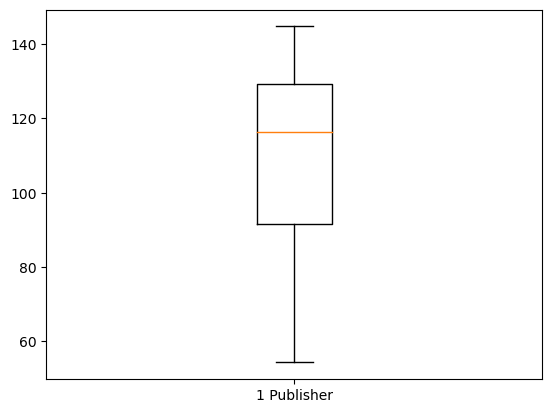

In [53]:
# Build X axis labels
labels = ['1 Publisher' ] # , '5 Publishers', '8 Publsihers', '10 Publishers', '14 Publishers']

plt.boxplot(broker_5pub_df['latency'], labels=labels)

plt.show()